In [95]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [96]:
setH_data = pd.read_csv('quizData_SetH.csv')
setH_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [97]:
numeric_data = pd.DataFrame(setH_data[["TV", "Radio", "Newspaper", "Sales"]])
numeric_data.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


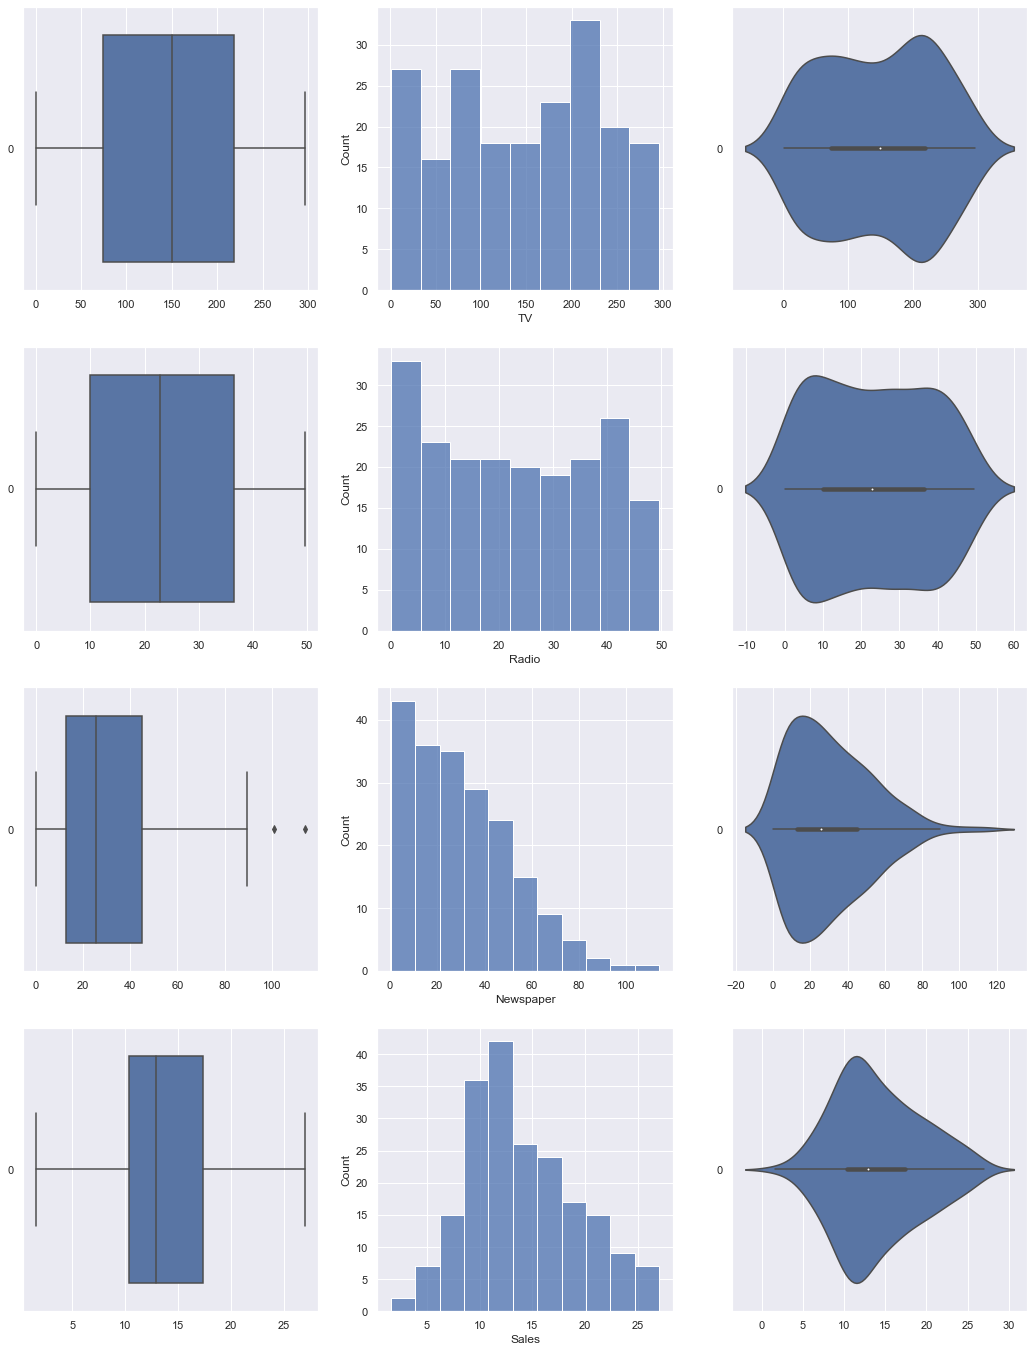

In [98]:
f, axes = plt.subplots(4, 3, figsize=(18, 24))
count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

1)a) From the graphs plotted, the sales graph shows the most "Normal" looking distribution by viewing the violin plot. 
The Newspaper variable has most number of outliers from the boxplot.

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

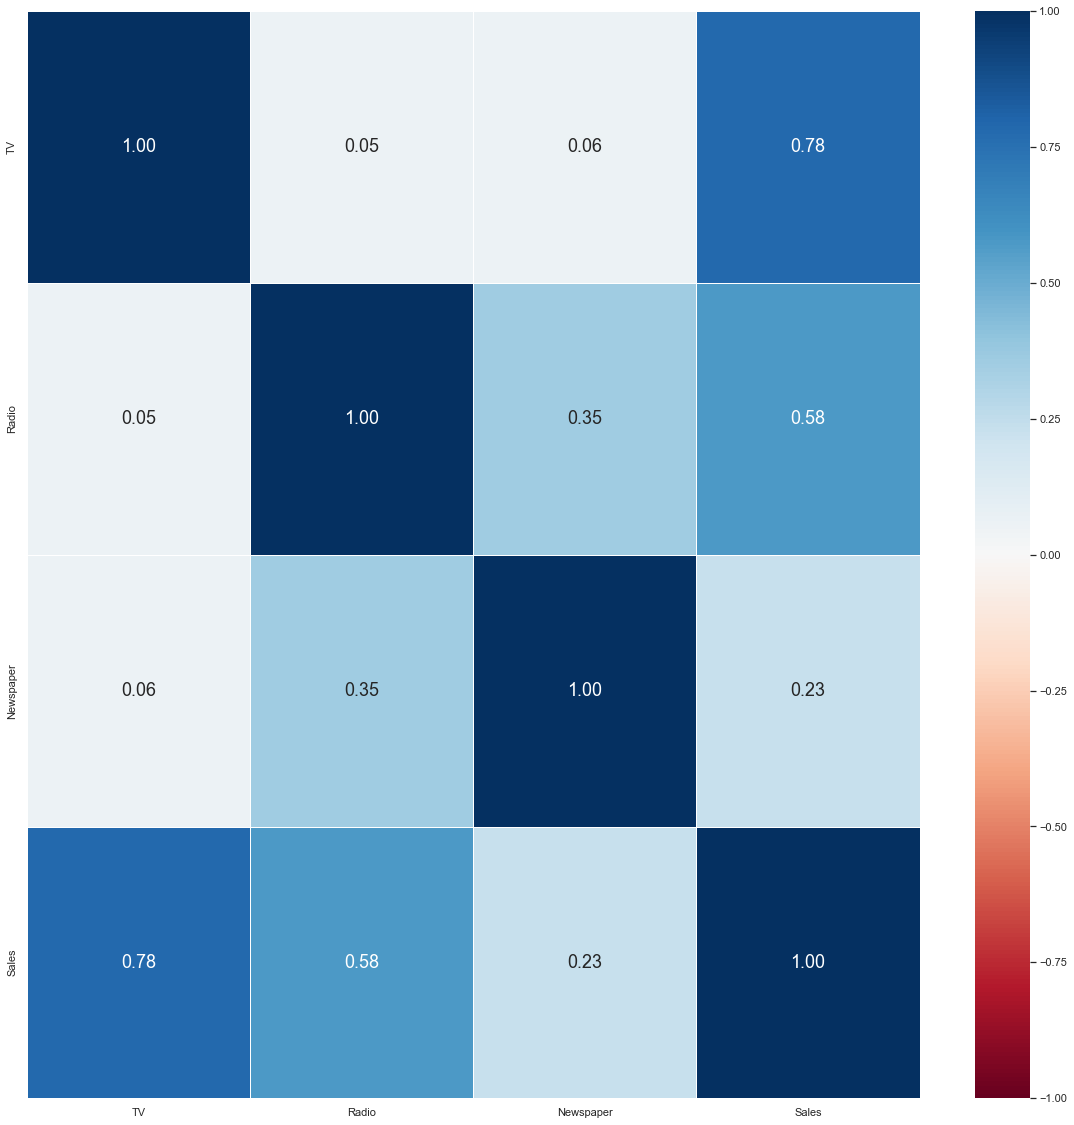

In [99]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

1)b) The TV has the highest corrrelation with sales at 0.78, this correlation is helpful in predicting sales as it is a strong correlation and knowing the data of TV would help with predicting the data for sales.

In [100]:
Sales = pd.DataFrame(setH_data['Sales'])
TV = pd.DataFrame(setH_data['TV'])
Radio = pd.DataFrame(setH_data['Radio'])
Newspaper = pd.DataFrame(setH_data['Newspaper'])

In [101]:
jointTS = pd.concat([TV, Sales], axis = 1).reindex(Sales.index)
jointRS = pd.concat([Radio, Sales], axis = 1).reindex(Sales.index)
jointNS = pd.concat([Newspaper, Sales], axis = 1).reindex(Sales.index)

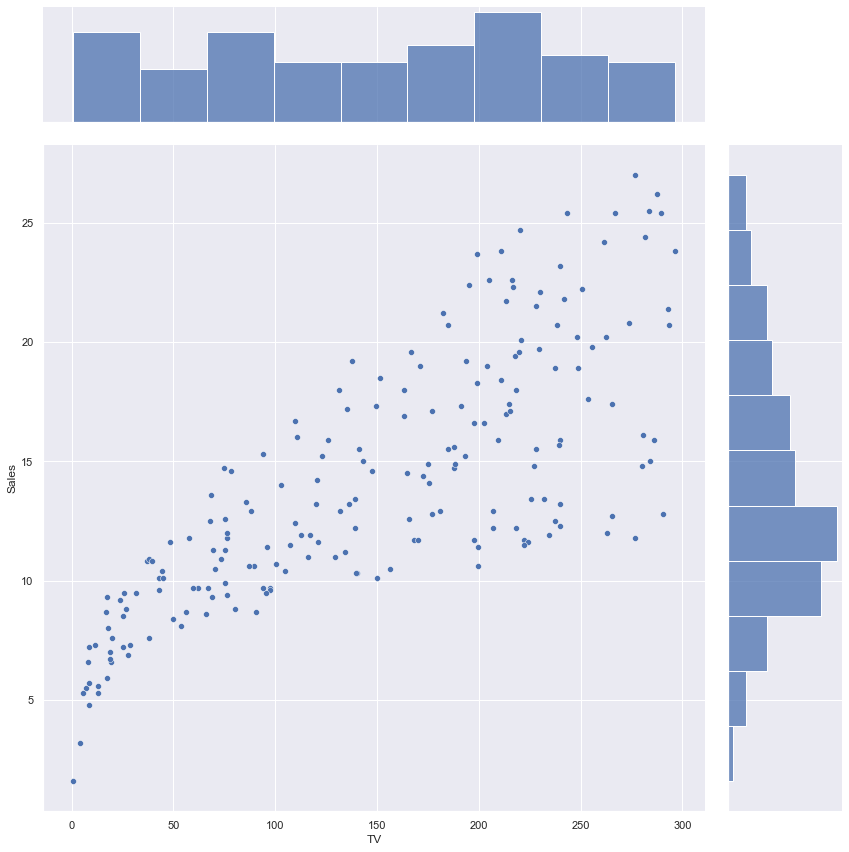

In [102]:
sb.jointplot(data = jointTS, x = "TV", y = "Sales", height = 12)

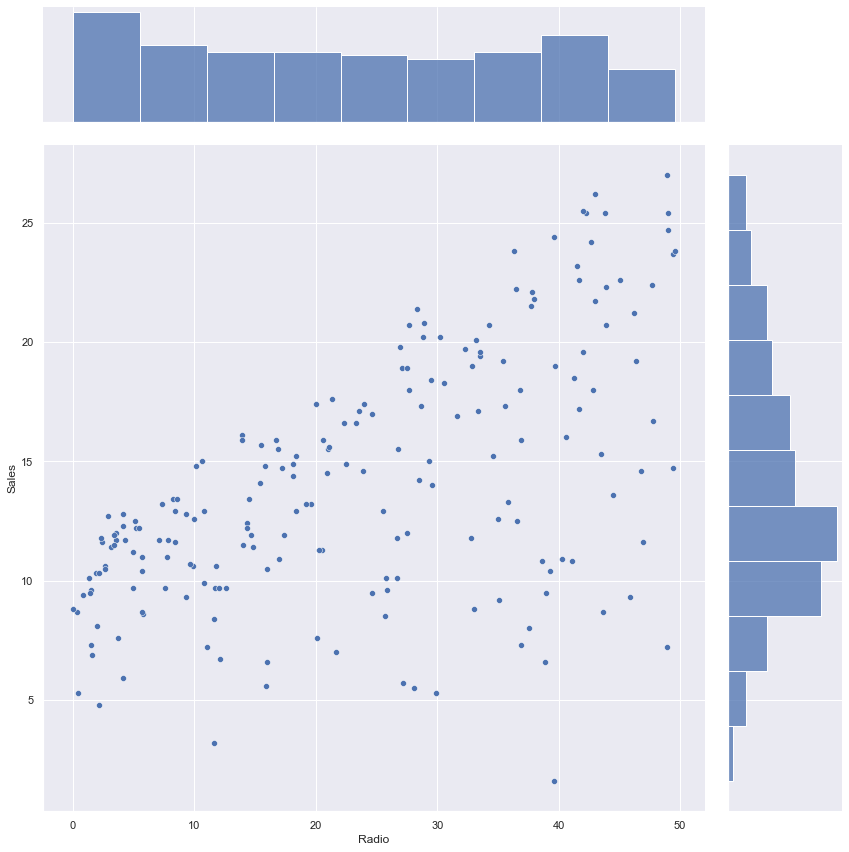

In [103]:
sb.jointplot(data = jointRS, x = "Radio", y = "Sales", height = 12)

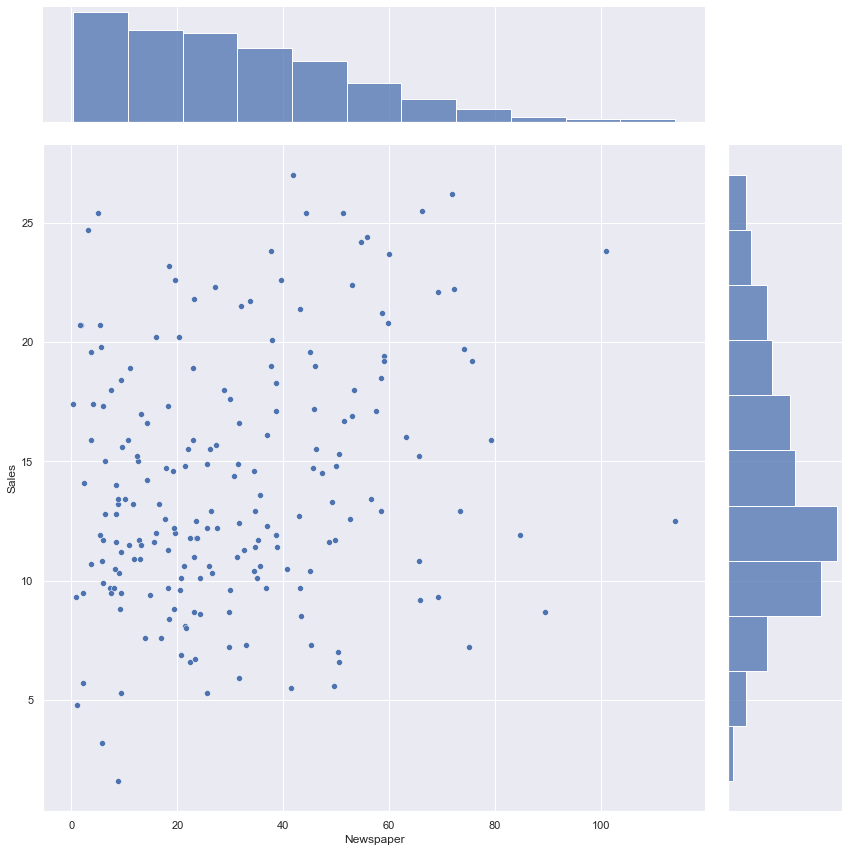

In [104]:
sb.jointplot(data = jointNS, x = "Newspaper", y = "Sales", height = 12)

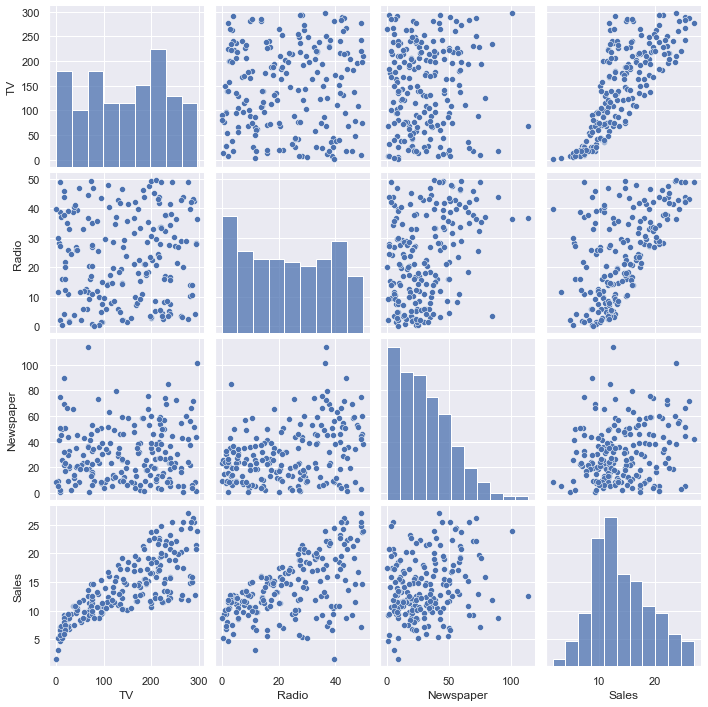

In [105]:
sb.pairplot(data = numeric_data)

1)c) From the graphs above, TV still shows the strongest linear relationship with sales. From the heatplot we already discovered that sales has the strongest correlation which would suggest a strong linear relation thus the prediction is not that useful.

We will start by setting up a Uni-Variate Linear Regression problem.

Response Variable : Sales
Predictor Feature : Radio

    Regression Model : Sales = 𝑎 × Radio + 𝑏

Repeat for Sales,Newspaper and Sales,TV for a total of 3 Uni-Variate Linear regression models.

Response Variable : Sales
Predictor Feature : Newspaper

    Regression Model : Sales = 𝑎 × Newspaper + 𝑏

Response Variable : Sales
Predictor Feature : TV

    Regression Model : Sales = 𝑎 × TV + 𝑏

In [106]:
# Train Set : 60% of samples (120)
Sales_train = pd.DataFrame(Sales[:120])
Radio_train = pd.DataFrame(Radio[:120])
Newspaper_train = pd.DataFrame(Newspaper[:120])
TV_train = pd.DataFrame(TV[:120])

# Test Set : 40% of samples (80)
Sales_test = pd.DataFrame(Sales[-80:])
Radio_test = pd.DataFrame(Radio[-80:])
Newspaper_test = pd.DataFrame(Newspaper[-80:])
TV_test = pd.DataFrame(TV[-80:])

# Check the sample sizes
print("Train Set :", Sales_train.shape, Radio_train.shape, Newspaper_train.shape, TV_train.shape)
print("Test Set  :", Sales_test.shape, Radio_test.shape, Newspaper_test.shape, TV_test.shape)

Train Set : (120, 1) (120, 1) (120, 1) (120, 1)
Test Set  : (80, 1) (80, 1) (80, 1) (80, 1)


In [107]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [108]:
# Train the Linear Regression model
linreg.fit(Radio_train, Sales_train)

LinearRegression()

In [109]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9.20319903]
Coefficients 	: a =  [[0.215274]]


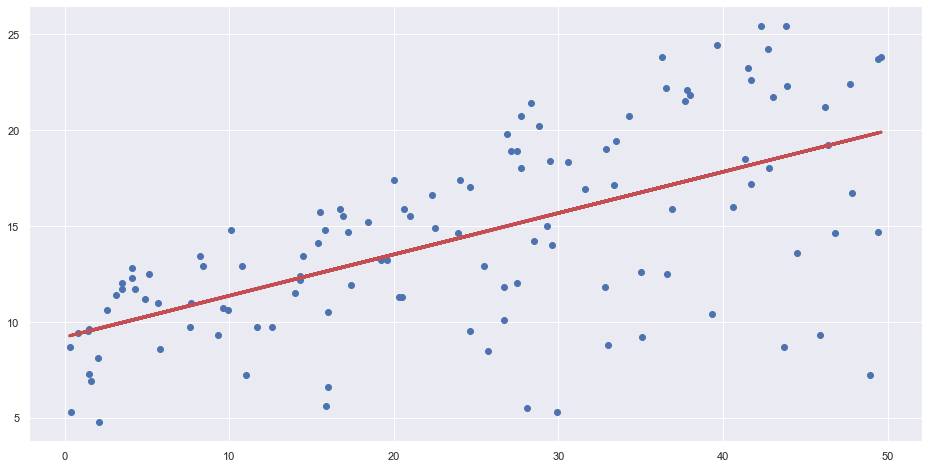

In [110]:
# Formula for the Regression line
regline_x = Radio_train.to_numpy()
regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Radio_train, Sales_train)
plt.plot(regline_x, regline_y, "r-", linewidth = 3)
plt.show()

Intercept 	: b =  [13.07391614]
Coefficients 	: a =  [[0.04052692]]


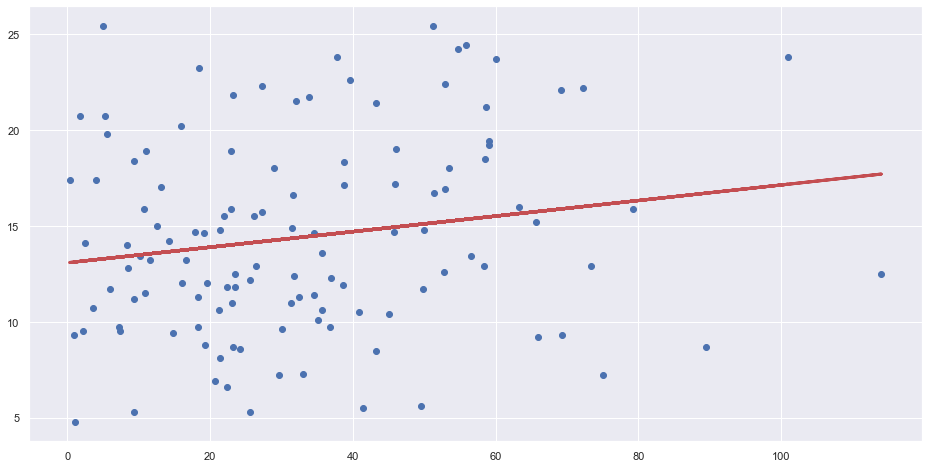

In [111]:
# Train the Linear Regression model
linreg.fit(Newspaper_train, Sales_train)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = Newspaper_train.to_numpy()
regline_y = linreg.intercept_ + linreg.coef_ * regline_x

f = plt.figure(figsize=(16, 8))
plt.scatter(Newspaper_train, Sales_train)
plt.plot(regline_x, regline_y, "r-", linewidth = 3)
plt.show()


Intercept 	: b =  [7.22687182]
Coefficients 	: a =  [[0.04831552]]


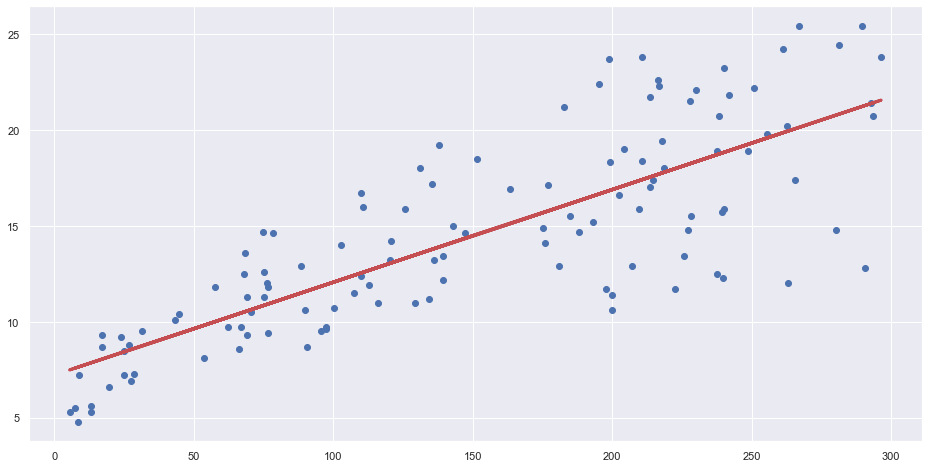

In [112]:
# Train the Linear Regression model
linreg.fit(TV_train, Sales_train)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
# Formula for the Regression line
regline_x = TV_train.to_numpy()
regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TV_train, Sales_train)
plt.plot(regline_x, regline_y, "r-", linewidth = 3)
plt.show()

2)a)Above is the linear models and regression line of each uni-variate.

Intercept 	: b =  [9.20319903]
Coefficients 	: a =  [[0.215274]]


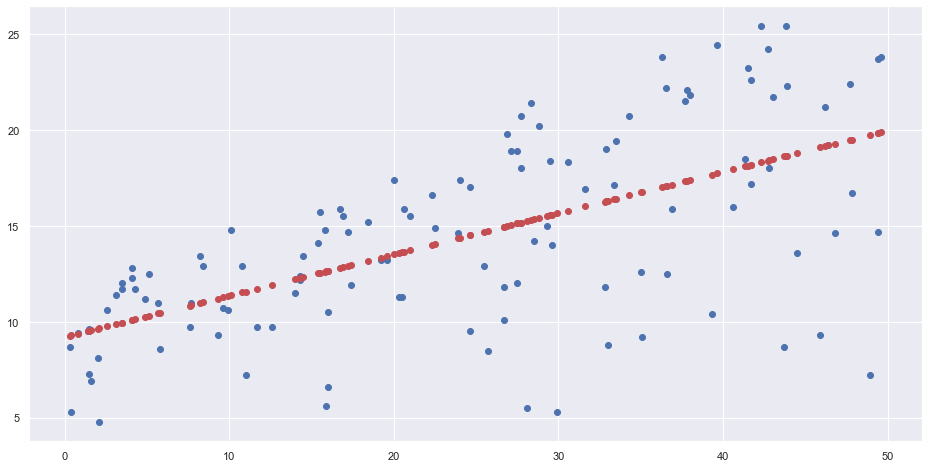

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3795709519182794
Mean Squared Error (MSE) 	: 16.14121611033429



In [113]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Train the Linear Regression model
linreg.fit(Radio_train, Sales_train)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_train_pred = linreg.predict(Radio_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Radio_train, Sales_train)
plt.scatter(Radio_train, Sales_train_pred, color = "r")
plt.show()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Radio_train, Sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_train, Sales_train_pred))
print()

Intercept 	: b =  [9.4735886]
Coefficients 	: a =  [[0.18138467]]


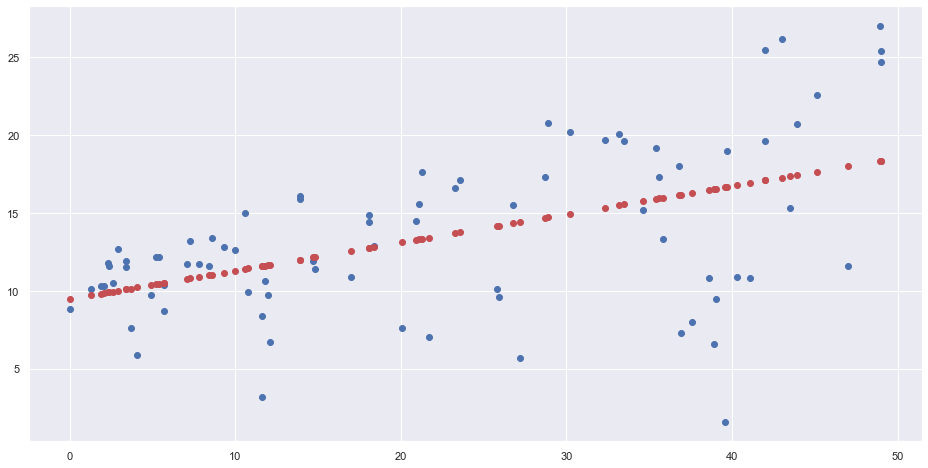

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.263802524863487
Mean Squared Error (MSE) 	: 20.715856151632117



In [114]:
# Train the Linear Regression model
linreg.fit(Radio_test, Sales_test)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_test_pred = linreg.predict(Radio_test)

#Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Radio_test, Sales_test)
plt.scatter(Radio_test, Sales_test_pred, color = "r")
plt.show()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Radio_test, Sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_test, Sales_test_pred))
print()

Intercept 	: b =  [13.07391614]
Coefficients 	: a =  [[0.04052692]]


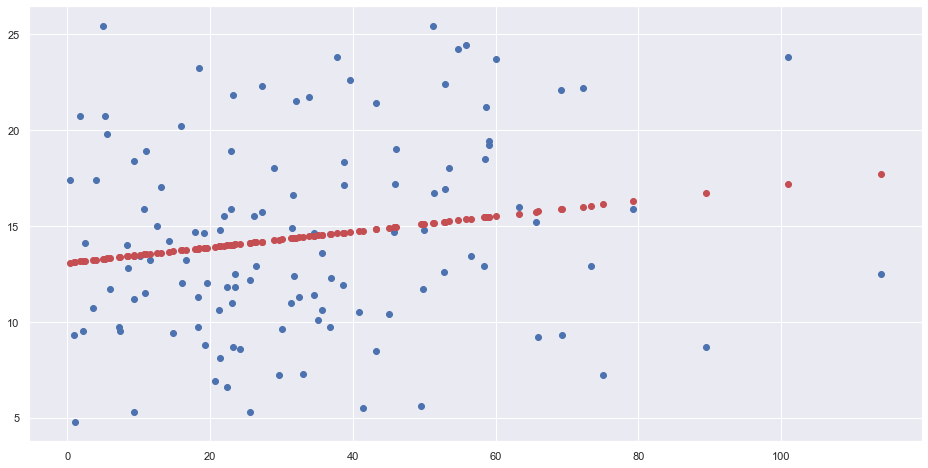

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.031641849260543586
Mean Squared Error (MSE) 	: 25.193014788099422



In [115]:
# Train the Linear Regression model
linreg.fit(Newspaper_train, Sales_train)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_train_pred = linreg.predict(Newspaper_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Newspaper_train, Sales_train)
plt.scatter(Newspaper_train, Sales_train_pred, color = "r")
plt.show()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Newspaper_train, Sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_train, Sales_train_pred))
print()

Intercept 	: b =  [11.40674865]
Coefficients 	: a =  [[0.07533923]]


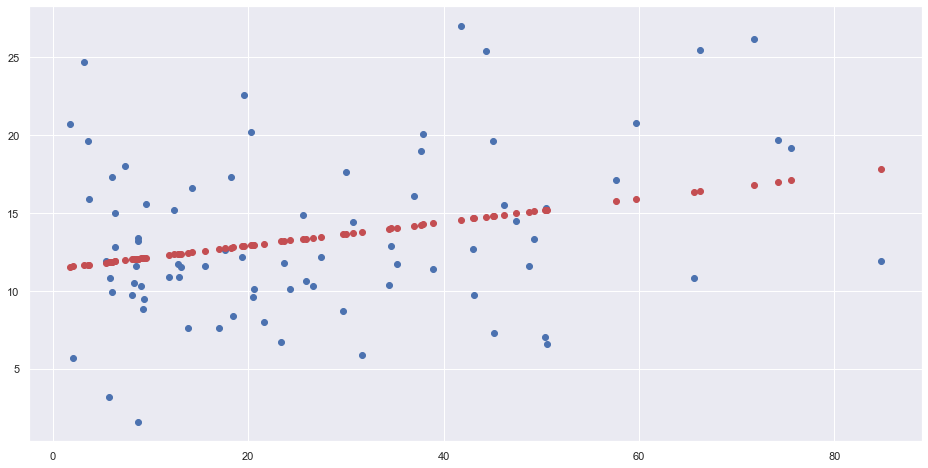

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08229905227049494
Mean Squared Error (MSE) 	: 25.823181232529617



In [116]:
# Train the Linear Regression model
linreg.fit(Newspaper_test, Sales_test)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_test_pred = linreg.predict(Newspaper_test)

#Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Newspaper_test, Sales_test)
plt.scatter(Newspaper_test, Sales_test_pred, color = "r")
plt.show()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Newspaper_test, Sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_test, Sales_test_pred))
print()

Intercept 	: b =  [7.22687182]
Coefficients 	: a =  [[0.04831552]]


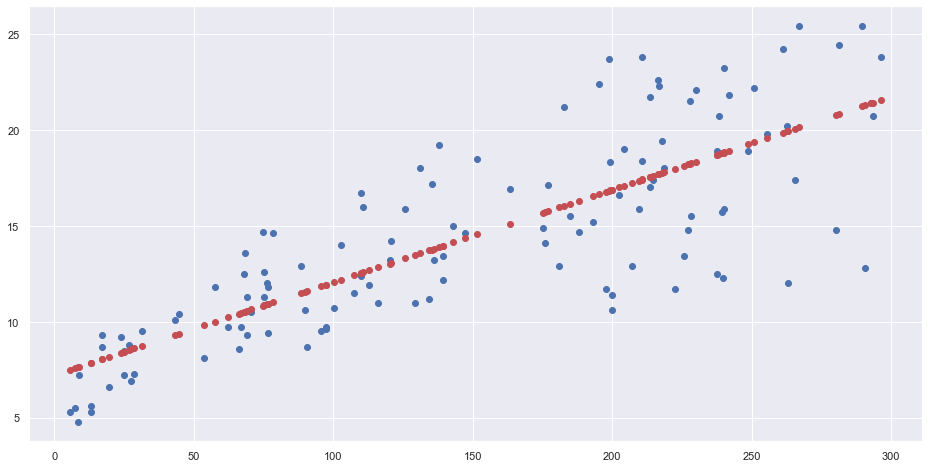

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6369977801544657
Mean Squared Error (MSE) 	: 9.443944149897511



In [117]:
# Train the Linear Regression model
linreg.fit(TV_train, Sales_train)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_train_pred = linreg.predict(TV_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TV_train, Sales_train)
plt.scatter(TV_train, Sales_train_pred, color = "r")
plt.show()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(TV_train, Sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_train, Sales_train_pred))
print()

Intercept 	: b =  [6.75773701]
Coefficients 	: a =  [[0.04622276]]


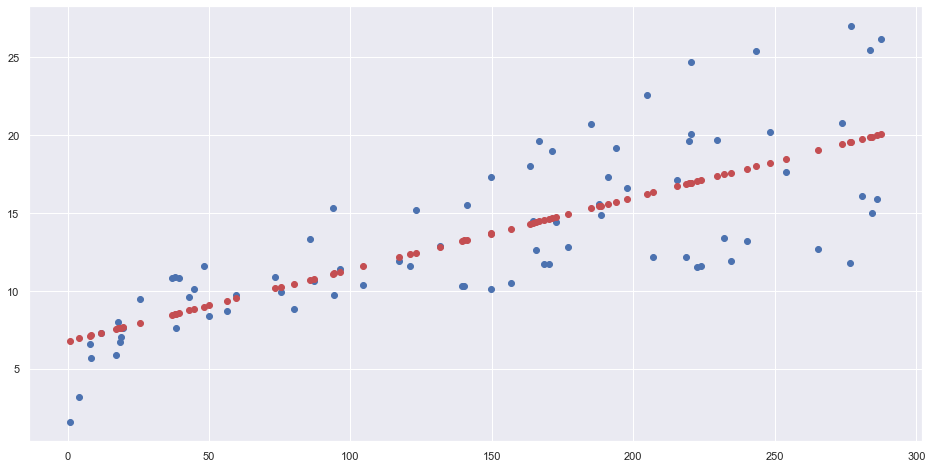

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5829414223319425
Mean Squared Error (MSE) 	: 11.735608710385359



In [118]:
# Train the Linear Regression model
linreg.fit(TV_test, Sales_test)
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Predict Sales values corresponding to TV Train
Sales_test_pred = linreg.predict(TV_test)

#Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TV_test, Sales_test)
plt.scatter(TV_test, Sales_test_pred, color = "r")
plt.show()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(TV_test, Sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Sales_test, Sales_test_pred))
print()

2)c)The TV linear model is best as it has the highest linear relation with a more conceiced plot

In [119]:
# Extract Response and Predictors
y = pd.DataFrame(setH_data["Sales"])
X = pd.DataFrame(setH_data[["Radio", "Newspaper", "TV"]])

In [120]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (120, 1) (120, 3)
Test Set  : (80, 1) (80, 3)


In [121]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [2.71392338]
Coefficients of Regression 	: a =  [[ 0.18172998 -0.0021834   0.04755513]]



,Predictors,Coefficients
0,Radio,0.181730
1,Newspaper,-0.002183
2,TV,0.047555


InvalidIndexError: (slice(None, None, None), None)

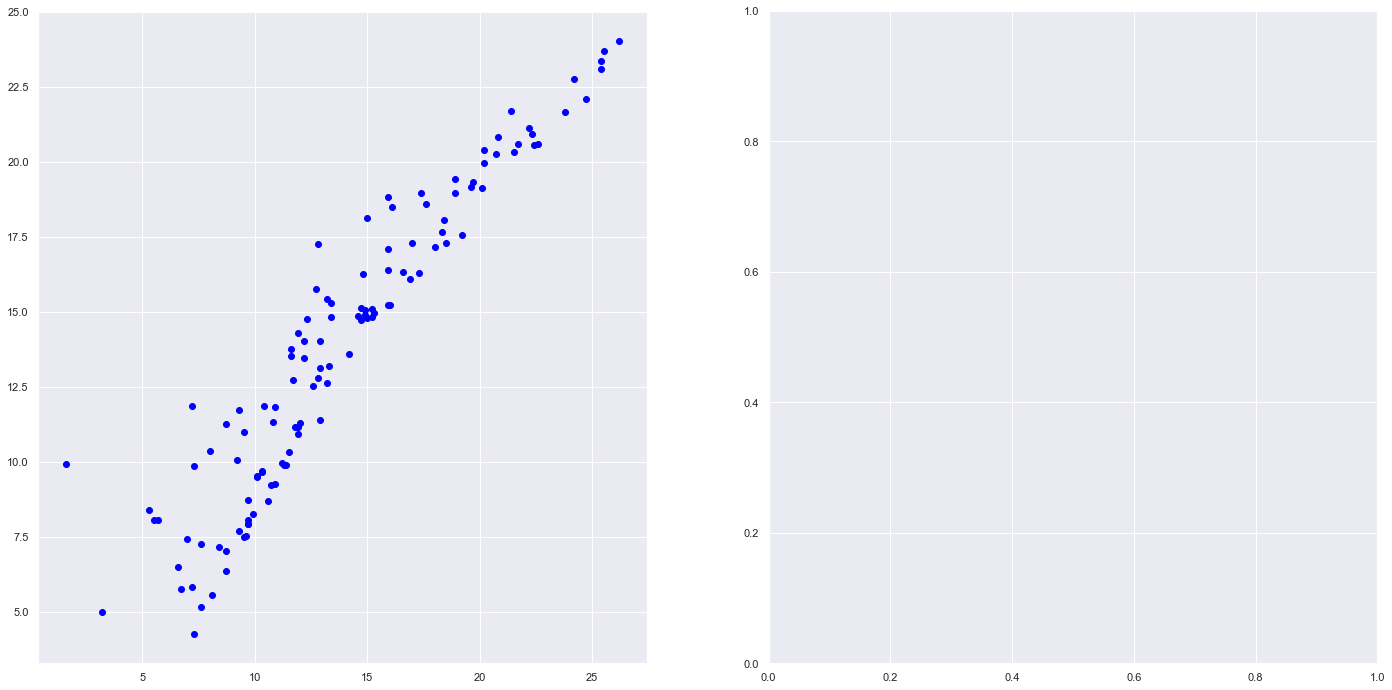

In [122]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()